In [1]:
import sys

sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from algorec.environments import BankLoanApplication1
from algorec.populations import BasePopulation
from algorec.recourse import NFeatureRecourse

set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
# TODO: K -> number of people or an array for each time step
THRESHOLD = 0.8
ADAPTATION = 0.2
# TODO: Fixed number (absolute) or an array for each time step
GROWTH_RATE = 0.2

# TODO: threshold drift metric
# TODO: population size visualization
# TODO: end and stop from updating when population becomes too small

In [3]:
# Generate data and fit regression
continuous = [f"Feature {i}" for i in range(N_CONTINUOUS)]
categorical = [f"cat_{i}" for i in range(N_CAT)]
rng = np.random.default_rng(RNG_SEED)
df = pd.DataFrame(
    rng.random((N_AGENTS, N_CONTINUOUS)),
    columns=[f"Feature {i}" for i in range(N_CONTINUOUS)],
)
for i in range(N_CAT):
    df[f"cat_{i}"] = rng.integers(0, 2, N_AGENTS)
y = rng.integers(0, 2, N_AGENTS)
lr = LogisticRegression().fit(df, y)

(array([ 4.,  5., 12., 14., 20., 10., 13., 11.,  8.,  3.]),
 array([0.37874517, 0.40511149, 0.43147781, 0.45784413, 0.48421045,
        0.51057677, 0.53694309, 0.56330941, 0.58967573, 0.61604205,
        0.64240837]),
 <BarContainer object of 10 artists>)

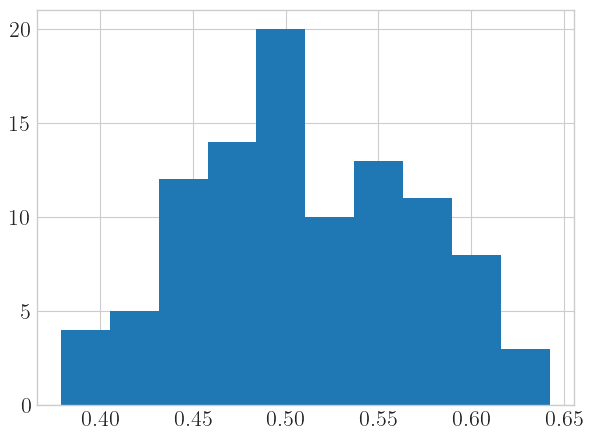

In [4]:
plt.hist(lr.predict_proba(df)[:, -1])

In [5]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
recourse = NFeatureRecourse(lr, n_features=2)
environment = BankLoanApplication1(
    population,
    recourse,
    threshold=THRESHOLD,
    adaptation=ADAPTATION,
    growth_rate=GROWTH_RATE,
    random_state=RNG_SEED,
)

environment.run_simulation(20)

<Axes: title={'center': 'Population scores over 21 time steps'}, xlabel='Step', ylabel='Score'>

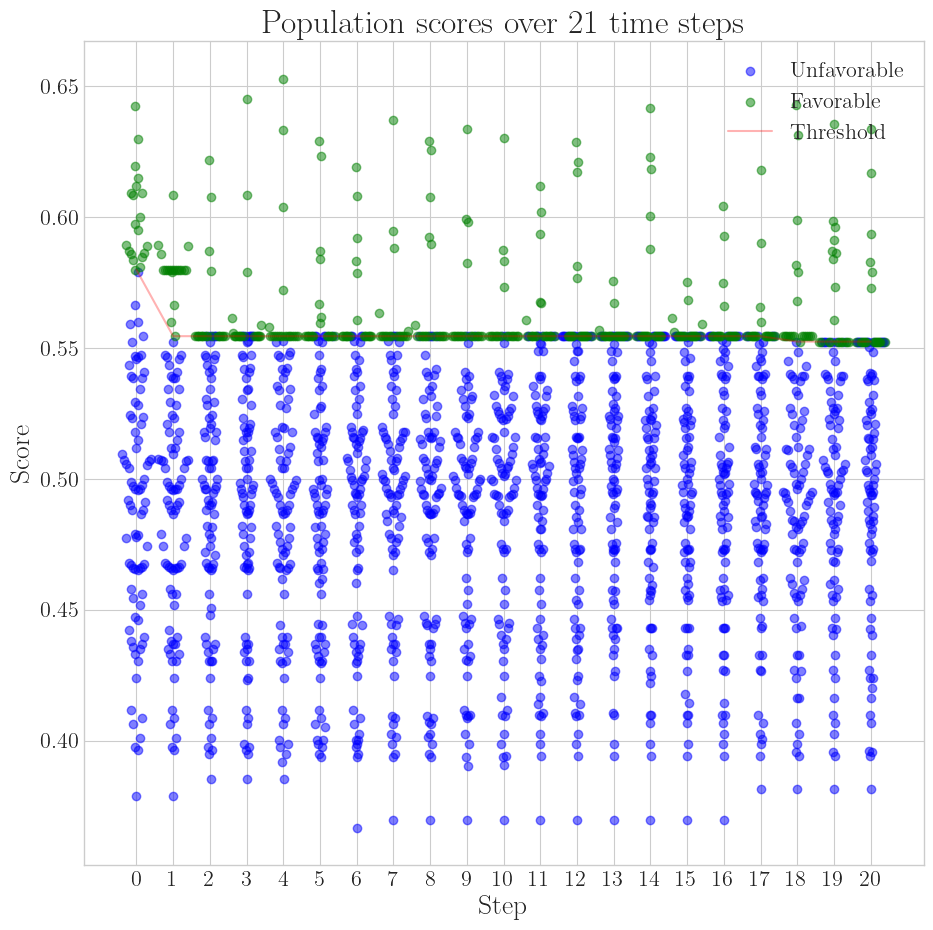

In [6]:
environment.plot.agent_scores()

<Axes: title={'center': 'Population at t=1'}, xlabel='Feature 0', ylabel='Feature 1'>

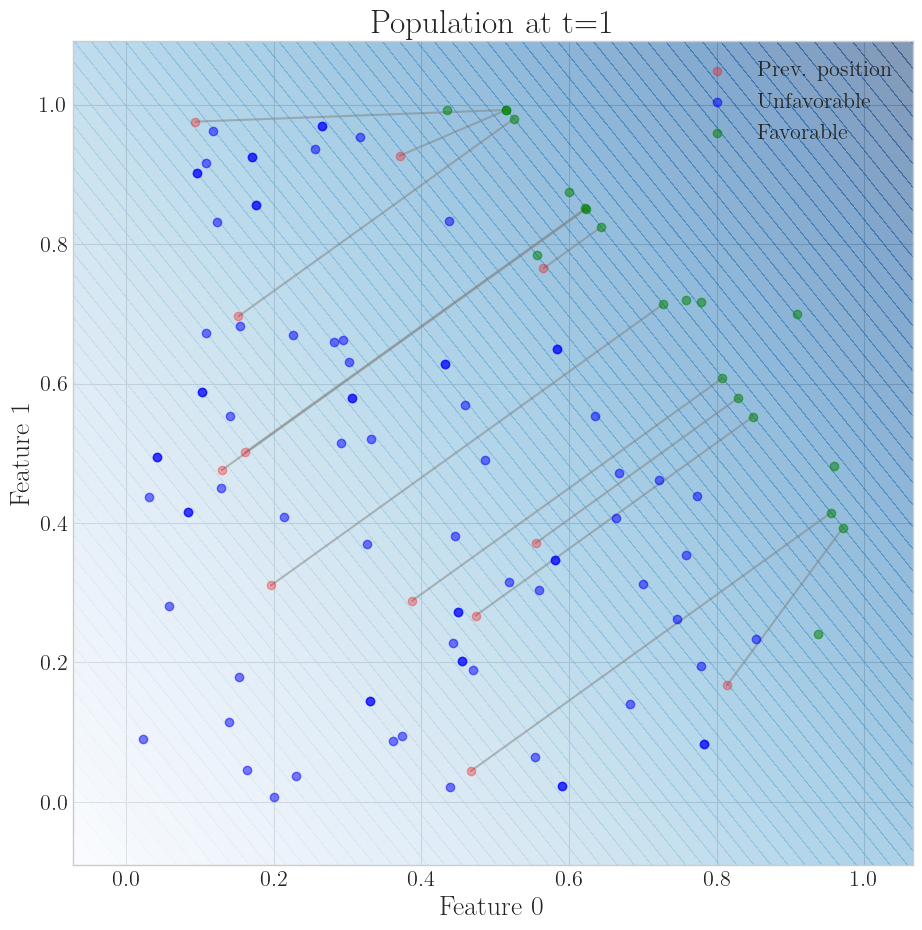

In [14]:
# environment.plot.scatter(1)
environment.plot.scatter(1)

# Additional Features

In [8]:
# A simple performance metric
environment.success_rate(1, 11)

array([1.        , 0.72727273, 0.8125    , 1.        , 0.72222222,
       1.        , 1.        , 0.875     , 0.93333333, 1.        ])

(array([ 4.,  5., 12., 14., 20., 10., 13., 11.,  8.,  3.]),
 array([0.37874517, 0.40511149, 0.43147781, 0.45784413, 0.48421045,
        0.51057677, 0.53694309, 0.56330941, 0.58967573, 0.61604205,
        0.64240837]),
 <BarContainer object of 10 artists>)

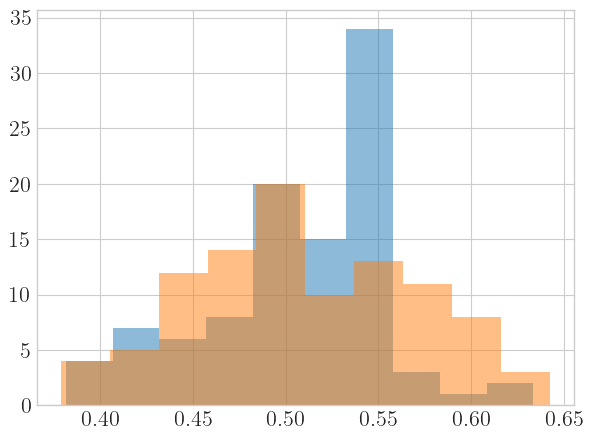

In [9]:
# Histogram with score distribution
environment.plot.scores_histogram(alpha=0.5)
environment.plot.scores_histogram(0, alpha=0.5)

<Axes: ylabel='Density'>

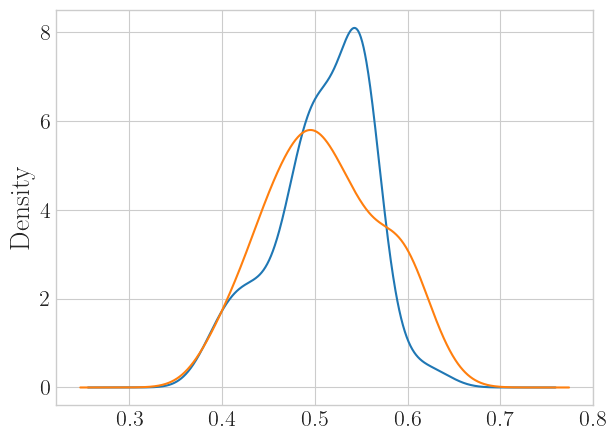

In [10]:
# KDE with score distribution
environment.plot.scores_kde()
environment.plot.scores_kde(0)

In [11]:
for i, meta in environment.metadata_.items():
    print(i, "\t", meta["population"].data.shape[0])

0 	 100
1 	 100
2 	 100
3 	 100
4 	 100
5 	 100
6 	 100
7 	 100
8 	 100
9 	 100
10 	 100
11 	 100
12 	 100
13 	 100
14 	 100
15 	 100
16 	 100
17 	 100
18 	 100
19 	 100
20 	 100
